In [105]:
# loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
dataset = pd.read_csv('50_Startups.csv')

In [107]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [108]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [109]:
# observations State is a categorical variable here
# We should be using Label encoder and one-hot-encoder here in that case

In [110]:
# splitting the data into features and target
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values
X,y

(array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida'],
        [131876.9, 99814.71, 362861.36, 'New York'],
        [134615.46, 147198.87, 127716.82, 'California'],
        [130298.13, 145530.06, 323876.68, 'Florida'],
        [120542.52, 148718.95, 311613.29, 'New York'],
        [123334.88, 108679.17, 304981.62, 'California'],
        [101913.08, 110594.11, 229160.95, 'Florida'],
        [100671.96, 91790.61, 249744.55, 'California'],
        [93863.75, 127320.38, 249839.44, 'Florida'],
        [91992.39, 135495.07, 252664.93, 'California'],
        [119943.24, 156547.42, 256512.92, 'Florida'],
        [114523.61, 122616.84, 261776.23, 'New York'],
        [78013.11, 121597.55, 264346.06, 'California'],
        [94657.16, 145077.58, 282574.31, 'New York'],
        [91749.1

In [111]:
# We have state consisting of Categorical variables.
from sklearn.preprocessing import LabelEncoder
labelencoder_X= LabelEncoder()

In [112]:
X[:,3] = labelencoder_X.fit_transform(X[:, 3])

In [113]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [114]:
# Now applying OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder_X = OneHotEncoder(categorical_features = [3])

In [115]:
X= onehotencoder_X.fit_transform(X).toarray()

In [116]:
X

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47198870e+05,   1.27716820e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+05,   1.45530060e+05,   3.23876680e+05],


In [117]:
# showing all the one hot encoded - state columns
X[:,:3]

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.

In [118]:
# Avoding the dummy variable trap
X = X[:,1:] #Manually doing it but generally algorithm will take care of this.

In [119]:
X[:,]

array([[  0.00000000e+00,   1.00000000e+00,   1.65349200e+05,
          1.36897800e+05,   4.71784100e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.62597700e+05,
          1.51377590e+05,   4.43898530e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.53441510e+05,
          1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.44372410e+05,
          1.18671850e+05,   3.83199620e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.42107340e+05,
          9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.31876900e+05,
          9.98147100e+04,   3.62861360e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.34615460e+05,
          1.47198870e+05,   1.27716820e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.30298130e+05,
          1.45530060e+05,   3.23876680e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.20542520e+05,
          1.48718950e+05,   3.11613290e+05],
       [  0.00000000e+00,   0.0000000

In [131]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [121]:
X_train, X_test, y_train, y_test

(array([[  1.00000000e+00,   0.00000000e+00,   5.54939500e+04,
           1.03057490e+05,   2.14634810e+05],
        [  0.00000000e+00,   1.00000000e+00,   4.60140200e+04,
           8.50474400e+04,   2.05517640e+05],
        [  1.00000000e+00,   0.00000000e+00,   7.53288700e+04,
           1.44135980e+05,   1.34050070e+05],
        [  0.00000000e+00,   0.00000000e+00,   4.64260700e+04,
           1.57693920e+05,   2.10797670e+05],
        [  1.00000000e+00,   0.00000000e+00,   9.17491600e+04,
           1.14175790e+05,   2.94919570e+05],
        [  1.00000000e+00,   0.00000000e+00,   1.30298130e+05,
           1.45530060e+05,   3.23876680e+05],
        [  1.00000000e+00,   0.00000000e+00,   1.19943240e+05,
           1.56547420e+05,   2.56512920e+05],
        [  0.00000000e+00,   1.00000000e+00,   1.00023000e+03,
           1.24153040e+05,   1.90393000e+03],
        [  0.00000000e+00,   1.00000000e+00,   5.42050000e+02,
           5.17431500e+04,   0.00000000e+00],
        [  0.000000

In [122]:
# do we need to do feature scaling - Library will take care it for us.

In [123]:
# Applying the Multiple Linear Regression algorithm now

In [124]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [125]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
y_pred = regressor.predict(X_test)

In [127]:
y_pred, y_test

(array([ 103015.20159795,  132582.27760817,  132447.73845176,
          71976.09851257,  178537.48221058,  116161.24230165,
          67851.69209675,   98791.73374686,  113969.43533013,
         167921.06569553]),
 array([ 103282.38,  144259.4 ,  146121.95,   77798.83,  191050.39,
         105008.31,   81229.06,   97483.56,  110352.25,  166187.94]))

In [128]:
plt.scatter(y_pred, y_test, color = 'red')

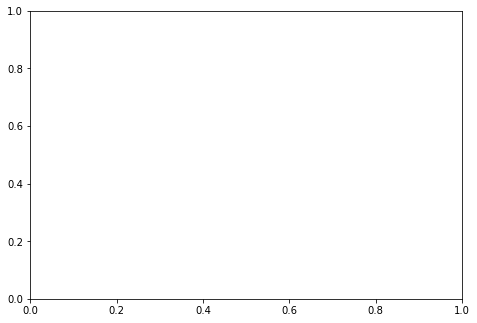

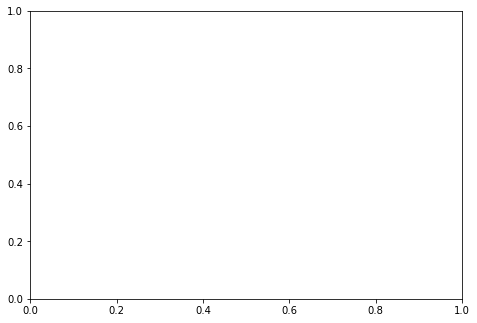

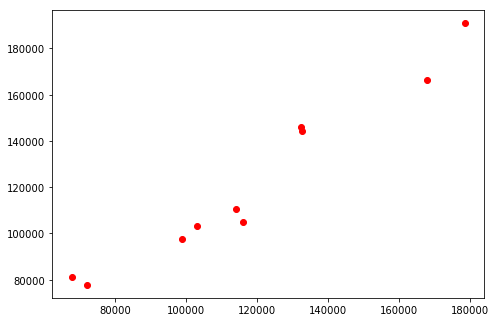

In [129]:
plt.show()

In [130]:
y_pred - y_test

array([  -267.17840205, -11677.12239183, -13674.21154824,  -5822.73148743,
       -12512.90778942,  11152.93230165, -13377.36790325,   1308.17374686,
         3617.18533013,   1733.12569553])

# Implementing the backward elimination

In [133]:
import statsmodels.formula.api as sm
# to enable b0*x0 we are going to add a column of 1s that replaces X0

X = np.append(arr=np.ones((50,1)).astype(int), values = X, axis = 1)

In [135]:
# proof that 1s got added.
X[:,0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [137]:
X_opt = X[:,[0,1,2,3,4,5]] # taking all the variables.

In [138]:
X_opt

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47198870e+05,   1.27716820e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+05,   1.45530060e+05,   3.23876680e+05],


In [139]:
# creating a new regressor using the statsmodel.
# ols is Ordinary Least Squares
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

# Getting the statistical summary that gives us the p-value

In [140]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.34e-27
Time:                        17:40:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000      3.62e+04   6.4e+04
x1           198.7888   3371.007      0.059      0.953     -6595.030  6992.607
x2           -41.8870   3256.039     -0.013      0.990     -6604.003  6520.229
x3             0.8060      0.046     17.369      0.000         0.712     0.900
x4            -0.0270      0.052     -0.517      0.608        -0.132     0.078
x5             0.0270      0.017      1.574      0.123        -0.008     0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# Lower the P-value (probability), the more the independent variable is significant with respect to dependent variable.
# Also P-value is the probability of getting a sample like ours. i.e., Higher the P-value it is pretty obvious that our sample is
# not strange. Lesser the P-value, the data is strange when we consider the Null hypothesis is true.

# from the summary table above (regressor_OLS.summary())
# Higher the P-value - Data isn't strange - No significance of independent variable in determining dependent variable.
# Lesser the P-value - Data is strange - Significane of independent variable in determining dependent variable.

# Refer notes - Peanuts in a chocolate bar example.

In [142]:
# from above, we can remove the x2 (dummy variable for state)
X_opt = X[:,[0,1,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.49e-29
Time:                        17:50:20   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000      3.67e+04  6.35e+04
x1           220.1585   2900.536      0.076      0.940     -5621.821  6062.138
x2             0.8060      0.046     17.606      0.000         0.714     0.898
x3            -0.0270      0.052     -0.523      0.604        -0.131     0.077
x4             0.0270      0.017      1.592      0.118        -0.007     0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
# from above, we can remove the x2 (dummy variable for state)
X_opt = X[:,[0,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.53e-30
Time:                        17:51:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000      3.69e+04  6.34e+04
x1             0.8057      0.045     17.846      0.000         0.715     0.897
x2            -0.0268      0.051     -0.526      0.602        -0.130     0.076
x3             0.0272      0.016      1.655      0.105        -0.006     0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
# At this moment both the dummy variables for state has no significance due to high P-value
# from above, we can remove the Administration column as P value is 0.602
X_opt = X[:,[0,3,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.16e-31
Time:                        17:56:08   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000      4.16e+04  5.24e+04
x1             0.7966      0.041     19.266      0.000         0.713     0.880
x2             0.0299      0.016      1.927      0.060        -0.001     0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
# At this moment,
# const - for X0
# X1 - R&D Spend, X2 - Marketing spend
# Here, X2 - Marketing spend is slightly significant as P > SL i.e., 0.06 > 0.05
X_opt = X[:,[0,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.38e-10
Time:                        17:58:32   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.000      4.46e+04  7.55e+04
x1             0.2465      0.032      7.803      0.000         0.183     0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# from the table above, the conclustion is R&D spend has given the highest significance.
# We couls also use R-squared and adjusted R-square to determine which have more significance on the dependent variable.

# Very Important - Automatic Backward Elimination